In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_csv("Data Model - Pizza Sales.csv")

This pizza sales dataset make up 12 relevant features:

```order_id```: Unique identifier for each order placed by a table
    
```order_details_id```: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
    
```pizza_id```: Unique key identifier that ties the pizza ordered to its details, like size and price
    
```quantity```: Quantity ordered for each pizza of the same type and size
    
```order_date```: Date the order was placed (entered into the system prior to cooking & serving)
    
```order_time```: Time the order was placed (entered into the system prior to cooking & serving)
    
```unit_price```: Price of the pizza in USD
    
```total_price```: unit_price * quantity
    
```pizza_size```: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
    
```pizza_type```: Unique key identifier that ties the pizza ordered to its details, like size and price
    
```pizza_ingredients```: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
    
```pizza_name```: Name of the pizza as shown in the menu


# Data Cleaning

## Drop useless columns

In [3]:
df.drop(columns="Unnamed: 12",inplace=True)

## Check none values

In [4]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## Correct string in ```pizza_ingredients```

In [5]:
df['pizza_ingredients'] = df['pizza_ingredients'].str.replace('慛duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic','Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic')

## Change ```order_date``` datatype to timestamp

In [6]:
df.loc[:, "timestamp"] = df["order_date"].apply(lambda s: pd.Timestamp(s))

## Price distribution 

In [16]:
frequency = df.loc[:, ["pizza_category","unit_price"]]

In [17]:
pivot1 = frequency.pivot(columns = 'pizza_category',values = 'unit_price')

In [18]:
from matplotlib import font_manager
import matplotlib.ticker as tick
from matplotlib.ticker import EngFormatter, StrMethodFormatter

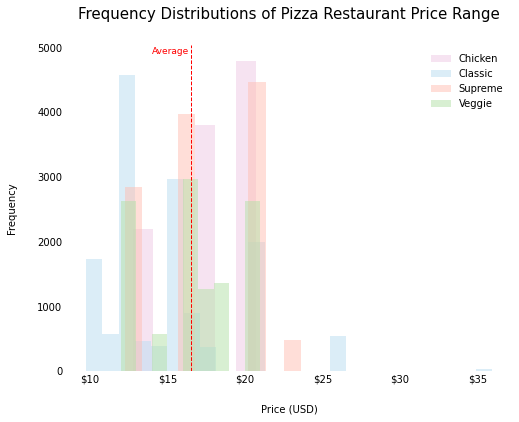

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

x = frequency["unit_price"]

ax.hist(pivot1["Chicken"], bins=6, alpha=0.5, label="Chicken", color="#eec9e5")
ax.hist(pivot1["Classic"], bins=25, alpha=0.5, label="Classic", color="#b9ddf1")
ax.hist(pivot1["Supreme"], bins=10, alpha=0.5, label="Supreme", color="#ffbeb2")
ax.hist(pivot1["Veggie"], bins=9, alpha=0.5, label="Veggie", color="#b3e1a6")

ax.set_frame_on(False) 

ax.text(14, 4900, "Average", fontsize = 9, color="red")

plt.xlabel("Price (USD)", size=10, labelpad=20)
plt.ylabel("Frequency", size=10, labelpad=20)

ax.xaxis.set_major_formatter(StrMethodFormatter("${x:.0f}"))

ax.tick_params(axis=u'y', which=u'both',length=0)
ax.tick_params(axis=u'x', which=u'both',length=0)

plt.title("Frequency Distributions of Pizza Restaurant Price Range", size=15, pad=26)
plt.legend(loc='upper right', frameon=False)

plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1)

#plt.tight_layout()
#plt.savefig('consumer preference1.jpg',dpi=250)

plt.show()